## Outliers

Not all data can be trusted; many times, we encounter errors in data that might lead to poor models. Such erroneous data points, often introduced due to human or conversion errors, are called **outliers**. Certain models, like Linear Regression, are sensitive to outliers, and their presence can degrade the performance of your machine learning model.

### Outlier Removal

**Outlier removal** is the process of eliminating these outliers to improve your model. One application of KMeans clustering is outlier removal. The following algorithm can be used to achieve this:

1. **Cluster the data using KMeans**.
2. **Identify points farthest from the centroids**.
3. **Remove points significantly far from the cluster centroids**.

In [3]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

# Create a fake dataset using make_blobs
# make_blobs generates isotropic Gaussian blobs for clustering
# X will contain the feature values, y will contain the cluster labels
X, y = make_blobs(n_samples=100, centers=1)



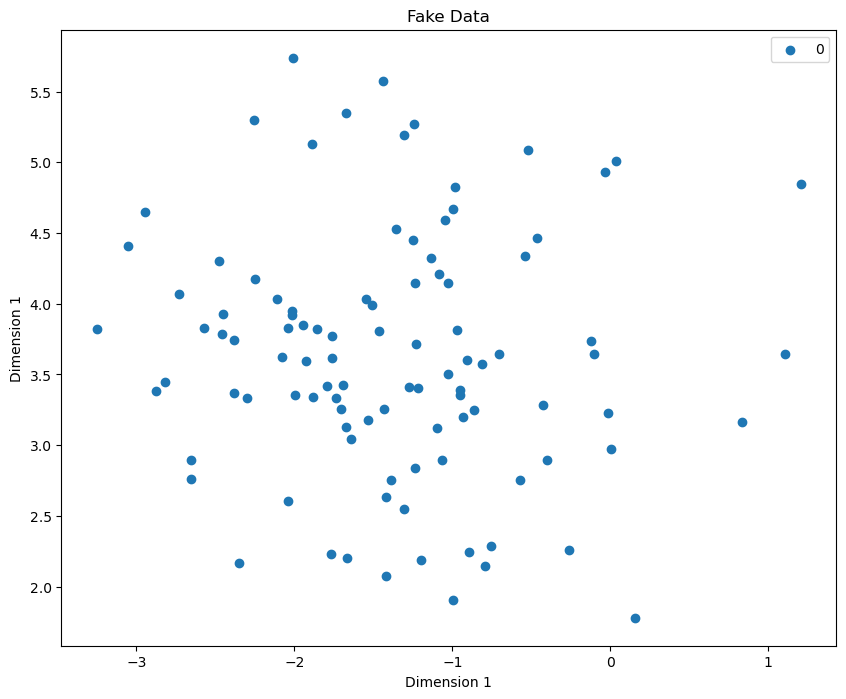

In [6]:
# Create a figure with a specified size
fig = plt.figure(figsize=(10, 8))

# Define a function to plot clusters
def plot_clusters(X, y):
    # Loop through each unique label
    for label in np.unique(y):
        # Scatter plot for each cluster
        plt.scatter(X[y == label][:, 0], X[y == label][:, 1], label=label)
    
    # Add a legend to the plot
    plt.legend()
    
    # Label the x-axis
    plt.xlabel("Dimension 1")
    
    # Label the y-axis
    plt.ylabel("Dimension 1")
    
    # Set the title of the plot
    plt.title("Fake Data")

# Call the function to plot the clusters
plot_clusters(X, y)

# Show the plot
plt.show()


## Identifying Cluster Centroids with KMeans

The next step is to use **KMeans** to identify cluster centroids. You might wonder why we don't just find the centroid directly by averaging the x and y values. While this approach might work in our simple example, it becomes impractical when dealing with multiple clusters.

Imagine having 5 clusters. We wouldn't know the clusters beforehand, which is why we use KMeans! KMeans helps us to automatically identify and assign data points to clusters, making it a powerful tool for clustering tasks.


In [8]:
from sklearn.cluster import KMeans

# Initialize the KMeans model with 1 cluster
clf = KMeans(n_clusters=1)

# Fit the KMeans model to the data
clf.fit(X)

# Retrieve the coordinates of the cluster centroid
centroids = clf.cluster_centers_

# Print the coordinates of the centroid
print("Centroid coordinates:", centroids)


Centroid coordinates: [[-1.38634682  3.62670135]]


C:\Users\men_l\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


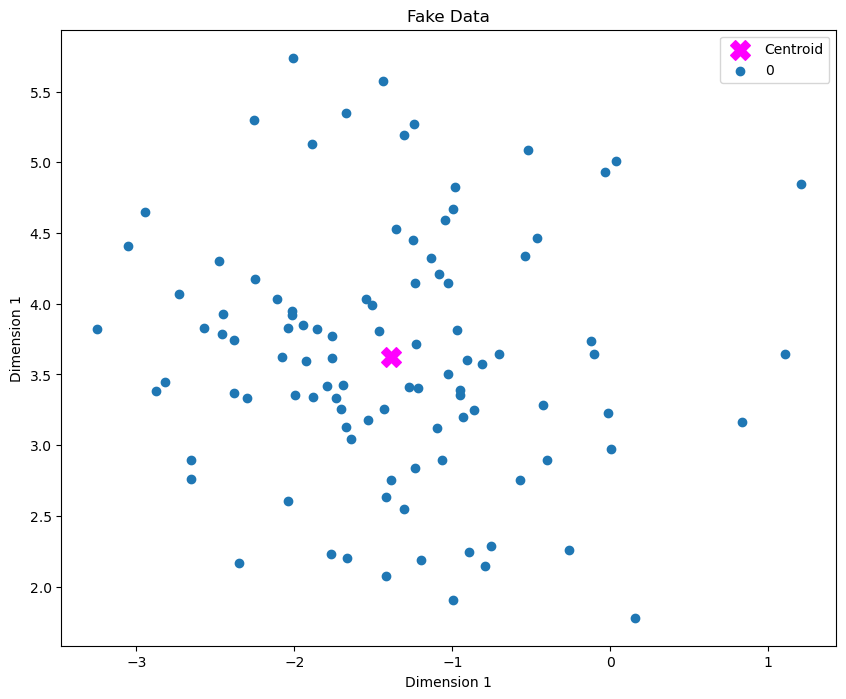

In [10]:
# Create a figure with a specified size
fig = plt.figure(figsize=(10, 8))

# Plot the centroid on the scatter plot
plt.scatter(centroids[0][0], centroids[0][1], label="Centroid", color="magenta", s=200, marker='X')

# Call the function to plot the clusters
plot_clusters(X, y)

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


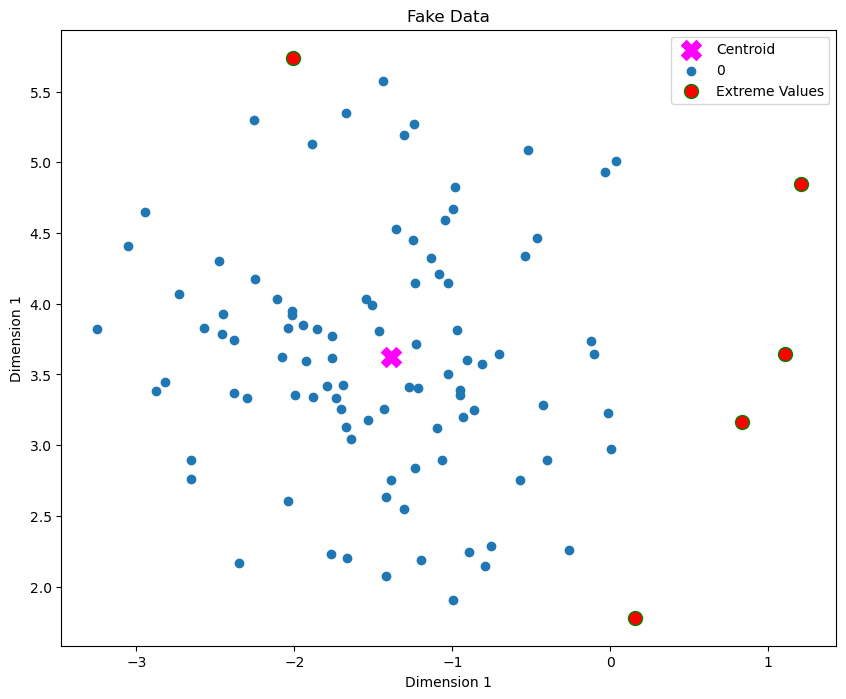

In [12]:
# Calculate the distances of each point from the centroid
distances = clf.transform(X)

# Create a figure with a specified size
fig = plt.figure(figsize=(10, 8))

# Plot the centroid on the scatter plot
plt.scatter(centroids[0][0], centroids[0][1], label="Centroid", color="magenta", s=200, marker='X')

# Sort the distances in descending order and get the indices of the 5 farthest points
sorted_indices = list(reversed(np.argsort(distances.ravel())))[:5]

# Call the function to plot the clusters
plot_clusters(X, y)

# Highlight the 5 farthest points (extreme values) on the scatter plot
plt.scatter(X[sorted_indices][:, 0], X[sorted_indices][:, 1], color="red", edgecolor="green", 
            s=100, label="Extreme Values")

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


### We can treat the 5 extreme points as outliers. Now we'll remove them and refit the model

C:\Users\men_l\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


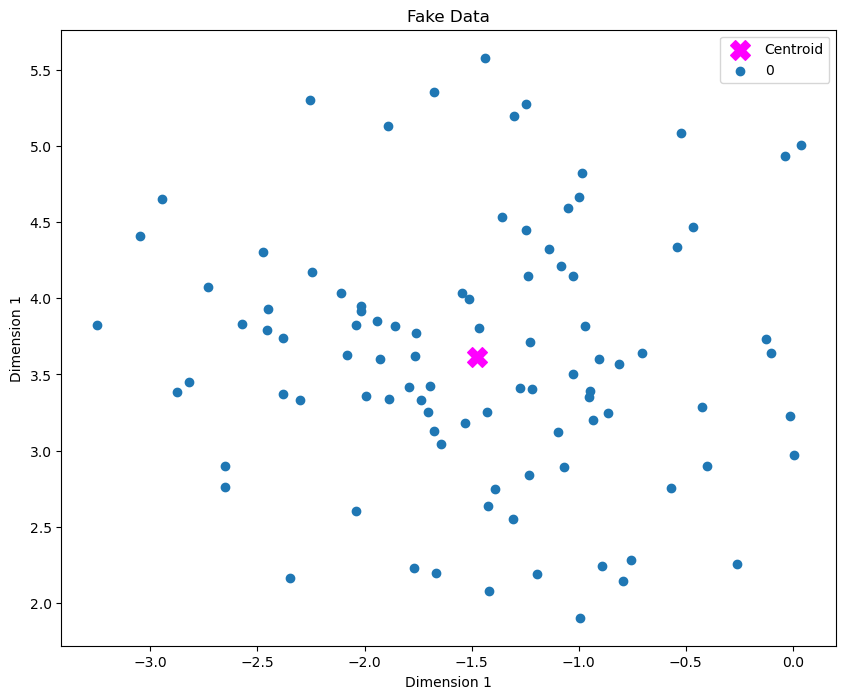

In [13]:
# Remove the extreme values from the dataset
X = np.delete(X, sorted_indices, axis=0)  # important to mention axis=0
y = np.delete(y, sorted_indices, axis=0)

# Initialize the KMeans model with 1 cluster
clf = KMeans(n_clusters=1)

# Fit the KMeans model to the updated data
clf.fit(X)

# Create a figure with a specified size
fig = plt.figure(figsize=(10, 8))

# Retrieve the coordinates of the new cluster centroid
centroids = clf.cluster_centers_

# Plot the new centroid on the scatter plot
plt.scatter(centroids[0][0], centroids[0][1], label="Centroid", color="magenta", s=200, marker='X')

# Call the function to plot the updated clusters
plot_clusters(X, y)

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


## Cluster Centroid Shift

The cluster centroid is shifted by a very small amount. This is because the outliers were in three extreme directions. If they were all in one direction, we would have seen a significant shift.

### Alternate View of Using KMeans to Remove Outliers

Imagine a Gaussian distribution with the cluster centroid as the mean. Removing an outlier in this scenario is equivalent to removing the point with the minimum likelihood.